In [411]:
library(dominanceanalysis)
library(repr)
require(e1071)
require(stats)
require(caTools)
library(ggplot2)
library(latex2exp)
options(repr.plot.width=12, repr.plot.height=12)

In [271]:
df.shots.train = read.csv('R_shots_train.csv')
df.shots.test = read.csv('R_shots_test.csv')
df.shots.train.synthetic = read.csv('R_shots_train_synthetic.csv')

In [272]:
colnames(df.shots.train)

[1] "competition"               "season"                   
 [3] "seasonIndex"               "gameMonthIndex"           
 [5] "matchId"                   "playerId"                 
 [7] "playerName"                "position"                 
 [9] "detailedPosition"          "playerTeamId"             
[11] "minsPlayed"                "subIn"                    
[13] "subOut"                    "replacedReplacingPlayerId"
[15] "booking"                   "eventId"                  
[17] "eventType"                 "eventSubType"             
[19] "eventTypeId"               "x1"                       
[21] "y1"                        "x2"                       
[23] "y2"                        "gameTime"                 
[25] "timeStamp"                 "periodId"                 
[27] "homeTeamName"              "homeTeamId"               
[29] "awayTeamName"              "awayTeamId"               
[31] "kickOffDateTime"           "minute"                   
[33] "second"                    "x1_m"                     
[35] "y1_m"                      "x2_m"                     
[37] "y2_m"                      "possessionTeamId"         
[39] "possessionSequenceIndex"   "possessionStartTime"      
[41] "possessionTimeSec"         "playerPossessionTimeSec"  
[43] "goalDelta"                 "numReds"                  
[45] "goalScoredFlag"            "xT"                       
[47] "x_dist_goal"               "x_dist_goal_2"            
[49] "c1_m"                      "c1_m_2"                   
[51] "vec_x"                     "vec_y"                    
[53] "D"                         "Dsquared"                 
[55] "Dcubed"                    "a"                        
[57] "aShooting"                 "pressureCountOnShot"      
[59] "penaltyFlag"               "realOrSynthetic"

### Scaling Features

In [407]:
basic.features <- c('c1_m','x_dist_goal')
added.features <- c('c1_m', 'D', 'a', 'aShooting')
adv.features <- c('a','D','aShooting','Dsquared','goalDelta','numReds','possessionTimeSec','pressureCountOnShot','playerPossessionTimeSec')
all.features <- c('c1_m','x_dist_goal','a','D','aShooting','Dsquared','goalDelta','numReds','possessionTimeSec','pressureCountOnShot','playerPossessionTimeSec')

In [274]:
X.train.scaled <- data.frame(scale(df.shots.train[,all.features], center = TRUE, scale = TRUE))
goalScoredFlag <- df.shots.train$goalScoredFlag
df.shots.train.scaled <- data.frame(goalScoredFlag, X.train.scaled)
head(df.shots.train.scaled)

,goalScoredFlag,c1_m,x_dist_goal,a,D,aShooting,Dsquared,goalDelta,numReds,possessionTimeSec,pressureCountOnShot,playerPossessionTimeSec
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,0.7766216,0.576710651,0.8733653,-0.2362459,-0.5903132,-0.30850506,-0.8598073,-0.08596465,-0.80450410,-0.2245612,-0.3228491
2,1,-1.0913376,-1.250994574,-1.4368661,0.1359811,2.4277405,0.05019034,1.4325973,-0.08596465,0.05194228,-0.2245612,-0.1922259
3,0,-1.3160545,-0.999354000,-1.2147988,0.3995508,1.6402575,0.31817679,-0.0956724,-0.08596465,1.76185755,-0.2245612,-0.2741150
4,0,1.0294281,-1.211261852,-1.0488446,-1.6627146,-0.6597091,-1.46878844,-0.0956724,-0.08596465,0.57544494,-0.2245612,-0.2909722
5,0,1.1839210,0.007208298,0.5268904,-1.0216061,-0.5818571,-0.98937283,-0.8598073,-0.08596465,-0.72453195,-0.2245612,-0.1554756
6,0,0.7344872,-0.429851647,-0.1353252,-1.0153739,-0.3375166,-0.98437540,-1.6239421,-0.08596465,0.86105431,-0.2245612,-0.2042896


In [275]:
X.train.synthetic.scaled <- data.frame(scale(df.shots.train.synthetic[,all.features], center = TRUE, scale = TRUE))
goalScoredFlag <- df.shots.train.synthetic$goalScoredFlag
df.shots.train.synthetic.scaled <- data.frame(goalScoredFlag, X.train.synthetic.scaled)
head(df.shots.train.synthetic.scaled)

,goalScoredFlag,c1_m,x_dist_goal,a,D,aShooting,Dsquared,goalDelta,numReds,possessionTimeSec,pressureCountOnShot,playerPossessionTimeSec
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,-0.29844957,-0.6589440,-0.4955872,-0.7124131,0.13838712,-0.6980173,-0.84979194,-0.05615057,-0.90353648,-0.284573,-0.4627236
2,1,-1.21568910,-1.1310713,-1.6956314,-0.6323001,3.47761675,-0.6548889,1.42221778,-0.05615057,0.05765412,-0.284573,-0.2752141
3,0,-1.32603371,-1.0660682,-1.5802791,-0.5755731,2.60633122,-0.6226670,-0.09245536,-0.05615057,1.97669367,-0.284573,-0.3927659
4,0,-0.17431189,-1.1208076,-1.4940745,-1.0194263,0.06160631,-0.8375263,-0.09245536,-0.05615057,0.64518165,-0.284573,-0.4169644
5,0,-0.09844997,-0.8060561,-0.6755627,-0.8814430,0.14774316,-0.7798828,-0.84979194,-0.05615057,-0.81378366,-0.284573,-0.2224591
6,0,-0.31913918,-0.9189561,-1.0195491,-0.8801017,0.41808589,-0.7792819,-1.60712851,-0.05615057,0.96572132,-0.284573,-0.2925315


### Basic Model

In [276]:
xG.model.basic = glm(goalScoredFlag ~ c1_m + x_dist_goal, family = binomial(link = 'logit'), data = df.shots.train)

summary(xG.model.basic)

anova(xG.model.basic)


Call:
glm(formula = goalScoredFlag ~ c1_m + x_dist_goal, family = binomial(link = "logit"), 
    data = df.shots.train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.0064  -0.5282  -0.3561  -0.2282   3.6564  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -0.254629   0.044122  -5.771 7.88e-09 ***
c1_m        -0.103596   0.004741 -21.851  < 2e-16 ***
x_dist_goal -0.100585   0.003043 -33.059  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 21390  on 32546  degrees of freedom
Residual deviance: 19262  on 32544  degrees of freedom
AIC: 19268

Number of Fisher Scoring iterations: 6


,Df,Deviance,Resid. Df,Resid. Dev
,<int>,<dbl>,<int>,<dbl>
NULL,NA,NA,32546,21389.85
c1_m,1,771.7899,32545,20618.06
x_dist_goal,1,1355.6624,32544,19262.40


### Additional Features

In [277]:
xG.model.added = glm(goalScoredFlag ~ c1_m + D + a + aShooting, family = binomial(link = 'logit'), data = df.shots.train)

summary(xG.model.added)

#anova(xG.model.added, test="Chisq")


Call:
glm(formula = goalScoredFlag ~ c1_m + D + a + aShooting, family = binomial(link = "logit"), 
    data = df.shots.train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9881  -0.4905  -0.3679  -0.2479   3.9011  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  2.90711    0.68785   4.226 2.38e-05 ***
c1_m        -0.19374    0.02522  -7.681 1.58e-14 ***
D           -0.16652    0.02272  -7.330 2.30e-13 ***
a            0.97676    0.41784   2.338   0.0194 *  
aShooting    1.76460    0.10046  17.565  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 21390  on 32546  degrees of freedom
Residual deviance: 19020  on 32542  degrees of freedom
AIC: 19030

Number of Fisher Scoring iterations: 6


### Advanced Features

In [298]:
xG.model.adv = glm(goalScoredFlag ~ a + aShooting + D + Dsquared + 
                   possessionTimeSec + goalDelta + numReds + pressureCountOnShot +
                   D:aShooting + D*a, family = binomial(link = 'logit'), data = df.shots.train)

summary(xG.model.adv)

#anova(xG.model.adv, test="Chisq")


Call:
glm(formula = goalScoredFlag ~ a + aShooting + D + Dsquared + 
    possessionTimeSec + goalDelta + numReds + pressureCountOnShot + 
    D:aShooting + D * a, family = binomial(link = "logit"), data = df.shots.train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.8870  -0.4322  -0.2796  -0.1720   3.5481  

Coefficients:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)         -6.5943438  0.8472617  -7.783 7.08e-15 ***
a                    5.5504770  1.0756307   5.160 2.47e-07 ***
aShooting            6.7288067  1.2509613   5.379 7.49e-08 ***
D                    0.0638670  0.0462981   1.379 0.167749    
Dsquared             0.0022307  0.0008611   2.590 0.009586 ** 
possessionTimeSec   -0.0019089  0.0007966  -2.396 0.016561 *  
goalDelta            0.7353734  0.0159767  46.028  < 2e-16 ***
numReds             -0.3376138  0.1241299  -2.720 0.006531 ** 
pressureCountOnShot -1.3742073  0.3606858  -3.810 0.000139 ***
aShooting:D        

### Advanced Features Scaled

In [289]:
xG.model.adv.features.scaled = glm(goalScoredFlag ~ a + aShooting + D + Dsquared + 
                   possessionTimeSec + goalDelta + numReds + pressureCountOnShot +
                   D:aShooting + D*a, family = binomial(link = 'logit'), data = df.shots.train.scaled)

summary(xG.model.adv.features.scaled)


Call:
glm(formula = goalScoredFlag ~ a + aShooting + D + Dsquared + 
    possessionTimeSec + goalDelta + numReds + pressureCountOnShot + 
    D:aShooting + D * a, family = binomial(link = "logit"), data = df.shots.train.scaled)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.8870  -0.4322  -0.2796  -0.1720   3.5481  

Coefficients:
                    Estimate Std. Error z value Pr(>|z|)    
(Intercept)         -2.87652    0.05893 -48.809  < 2e-16 ***
a                   -0.55782    0.04796 -11.631  < 2e-16 ***
aShooting            0.38801    0.03148  12.326  < 2e-16 ***
D                   -0.74342    0.31016  -2.397 0.016534 *  
Dsquared             0.82003    0.31656   2.590 0.009586 ** 
possessionTimeSec   -0.05001    0.02087  -2.396 0.016561 *  
goalDelta            0.96236    0.02091  46.028  < 2e-16 ***
numReds             -0.05804    0.02134  -2.720 0.006531 ** 
pressureCountOnShot -0.87505    0.22967  -3.810 0.000139 ***
aShooting:D         -0.24668    

---

### Synthetic Shots Scaled

In [296]:
xG.model.syn.scaled = glm(goalScoredFlag ~ a + aShooting +
                   D + Dsquared + possessionTimeSec + playerPossessionTimeSec +
                   goalDelta + numReds + pressureCountOnShot +
                   D:aShooting + D*a
                   , family = binomial(link = 'logit'), data = df.shots.train.synthetic.scaled)

summary(xG.model.syn.scaled)

#anova(xG.model.syn, test="Chisq")

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Call:
glm(formula = goalScoredFlag ~ a + aShooting + D + Dsquared + 
    possessionTimeSec + playerPossessionTimeSec + goalDelta + 
    numReds + pressureCountOnShot + D:aShooting + D * a, family = binomial(link = "logit"), 
    data = df.shots.train.synthetic.scaled)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.8263  -0.2357  -0.0560  -0.0005   4.0527  

Coefficients:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)              -8.29471    0.49259 -16.839  < 2e-16 ***
a                        -2.54249    0.18745 -13.564  < 2e-16 ***
aShooting                -0.18343    0.13094  -1.401 0.161250    
D                         5.32961    0.90298   5.902 3.59e-09 ***
Dsquared                -11.23932    1.63759  -6.863 6.73e-12 ***
possessionTimeSec        -0.05834    0.01970  -2.962 0.003055 ** 
playerPossessionTimeSec   0.05147    0.02067   2.490 0.012774 *  
goalDelta                 0.94752    0.02069  45.798  < 2e-16 ***
numReds

---

### Advanced Features + Synthetic Shots

In [473]:
xG.model.syn = glm(goalScoredFlag ~ a + aShooting +
                   D + Dsquared + possessionTimeSec + playerPossessionTimeSec +
                   goalDelta + numReds + pressureCountOnShot +
                   D*aShooting + D*a + Dsquared*aShooting
                   , family = binomial(link = 'logit'), data = df.shots.train.synthetic)

summary(xG.model.syn)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Call:
glm(formula = goalScoredFlag ~ a + aShooting + D + Dsquared + 
    possessionTimeSec + playerPossessionTimeSec + goalDelta + 
    numReds + pressureCountOnShot + D * aShooting + D * a + Dsquared * 
    aShooting, family = binomial(link = "logit"), data = df.shots.train.synthetic)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.8219  -0.2377  -0.0532  -0.0002   4.2064  

Coefficients:
                          Estimate Std. Error z value Pr(>|z|)    
(Intercept)             -1.233e+01  1.079e+00 -11.430  < 2e-16 ***
a                        2.630e+00  5.727e-01   4.593 4.37e-06 ***
aShooting                1.723e+01  5.729e+00   3.008  0.00263 ** 
D                        5.007e-01  6.261e-02   7.997 1.27e-15 ***
Dsquared                -5.485e-03  1.022e-03  -5.366 8.03e-08 ***
possessionTimeSec       -2.457e-03  8.437e-04  -2.913  0.00358 ** 
playerPossessionTimeSec  5.679e-03  2.378e-03   2.388  0.01694 *  
goalDelta                7.166e-01  1.566e-02  

In [469]:
-2.457e-03

[1] -0.002457

In [463]:
1.241e-02

[1] 0.01241

---

## Synthetic No Interaction Terms

In [299]:
xG.model.syn.no.int = glm(goalScoredFlag ~ a + aShooting +
                   D + possessionTimeSec + Dsquared + playerPossessionTimeSec +
                   goalDelta + numReds + pressureCountOnShot
                   , family = binomial(link = 'logit'), data = df.shots.train.synthetic)

summary(xG.model.syn.no.int)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Call:
glm(formula = goalScoredFlag ~ a + aShooting + D + possessionTimeSec + 
    Dsquared + playerPossessionTimeSec + goalDelta + numReds + 
    pressureCountOnShot, family = binomial(link = "logit"), data = df.shots.train.synthetic)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.8499  -0.2402  -0.0597  -0.0004   4.7437  

Coefficients:
                          Estimate Std. Error z value Pr(>|z|)    
(Intercept)             -9.0290316  0.4988317 -18.100  < 2e-16 ***
a                       -2.2948567  0.1312621 -17.483  < 2e-16 ***
aShooting                1.4254663  0.0920327  15.489  < 2e-16 ***
D                        0.4121212  0.0318741  12.930  < 2e-16 ***
possessionTimeSec       -0.0024111  0.0008447  -2.854  0.00431 ** 
Dsquared                -0.0062124  0.0004978 -12.479  < 2e-16 ***
playerPossessionTimeSec  0.0055359  0.0023835   2.323  0.02020 *  
goalDelta                0.7141928  0.0156104  45.751  < 2e-16 ***
numReds                 -0.30434

---

# Feature Dominance

In [300]:
da.adv.no.int <- dominanceAnalysis(xG.model.syn.no.int)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

In [301]:
da.adv <- dominanceAnalysis(xG.model.adv)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

In [302]:
da.syn <- dominanceAnalysis(xG.model.syn)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

In [303]:
da.syn$contribution.average$r2.m

a               aShooting                       D 
           0.0521138829            0.0469863770            0.0266988804 
               Dsquared       possessionTimeSec playerPossessionTimeSec 
           0.0283745617            0.0001719001            0.0013443013 
              goalDelta                 numReds     pressureCountOnShot 
           0.0854469547            0.0002799869            0.0066141192 
            aShooting:D                     a:D      aShooting:Dsquared 
           0.0429558476            0.0525510193            0.0272171066

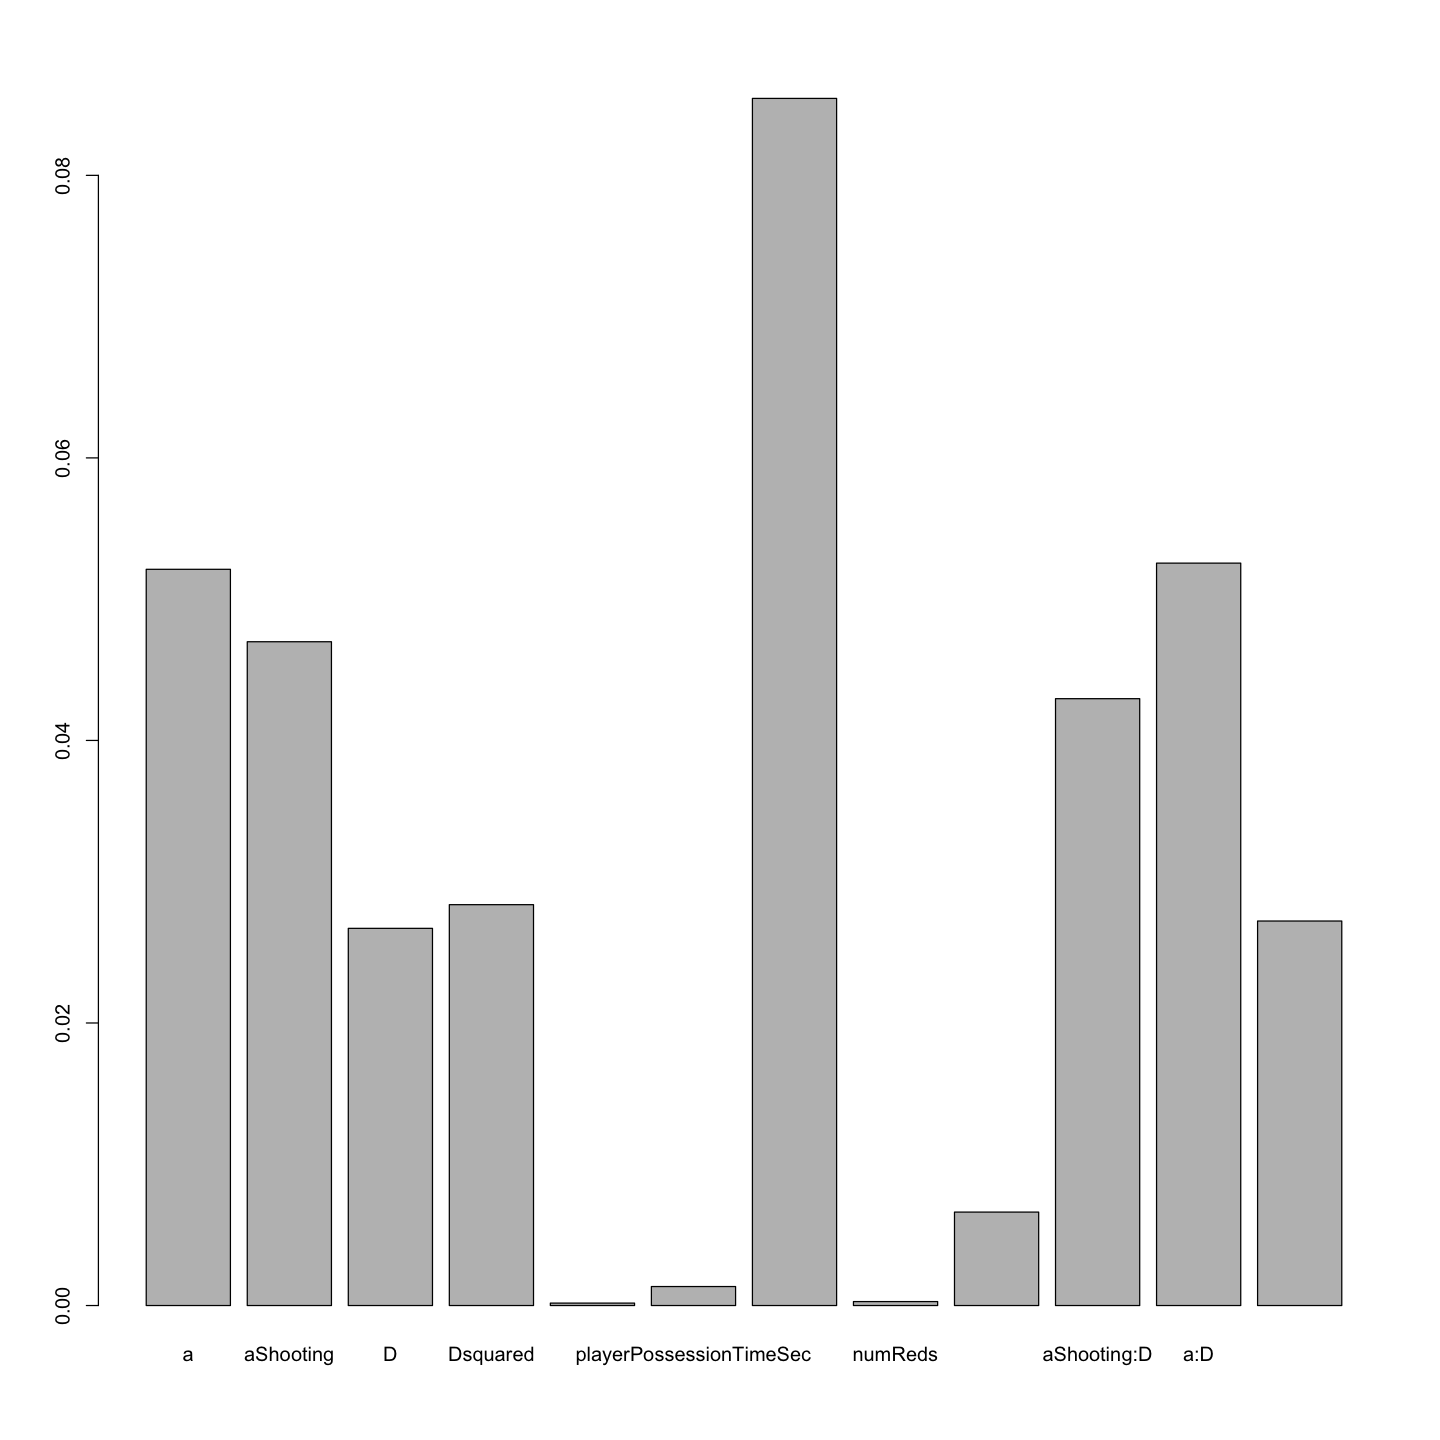

In [304]:
barplot(da.syn$contribution.average$r2.m)

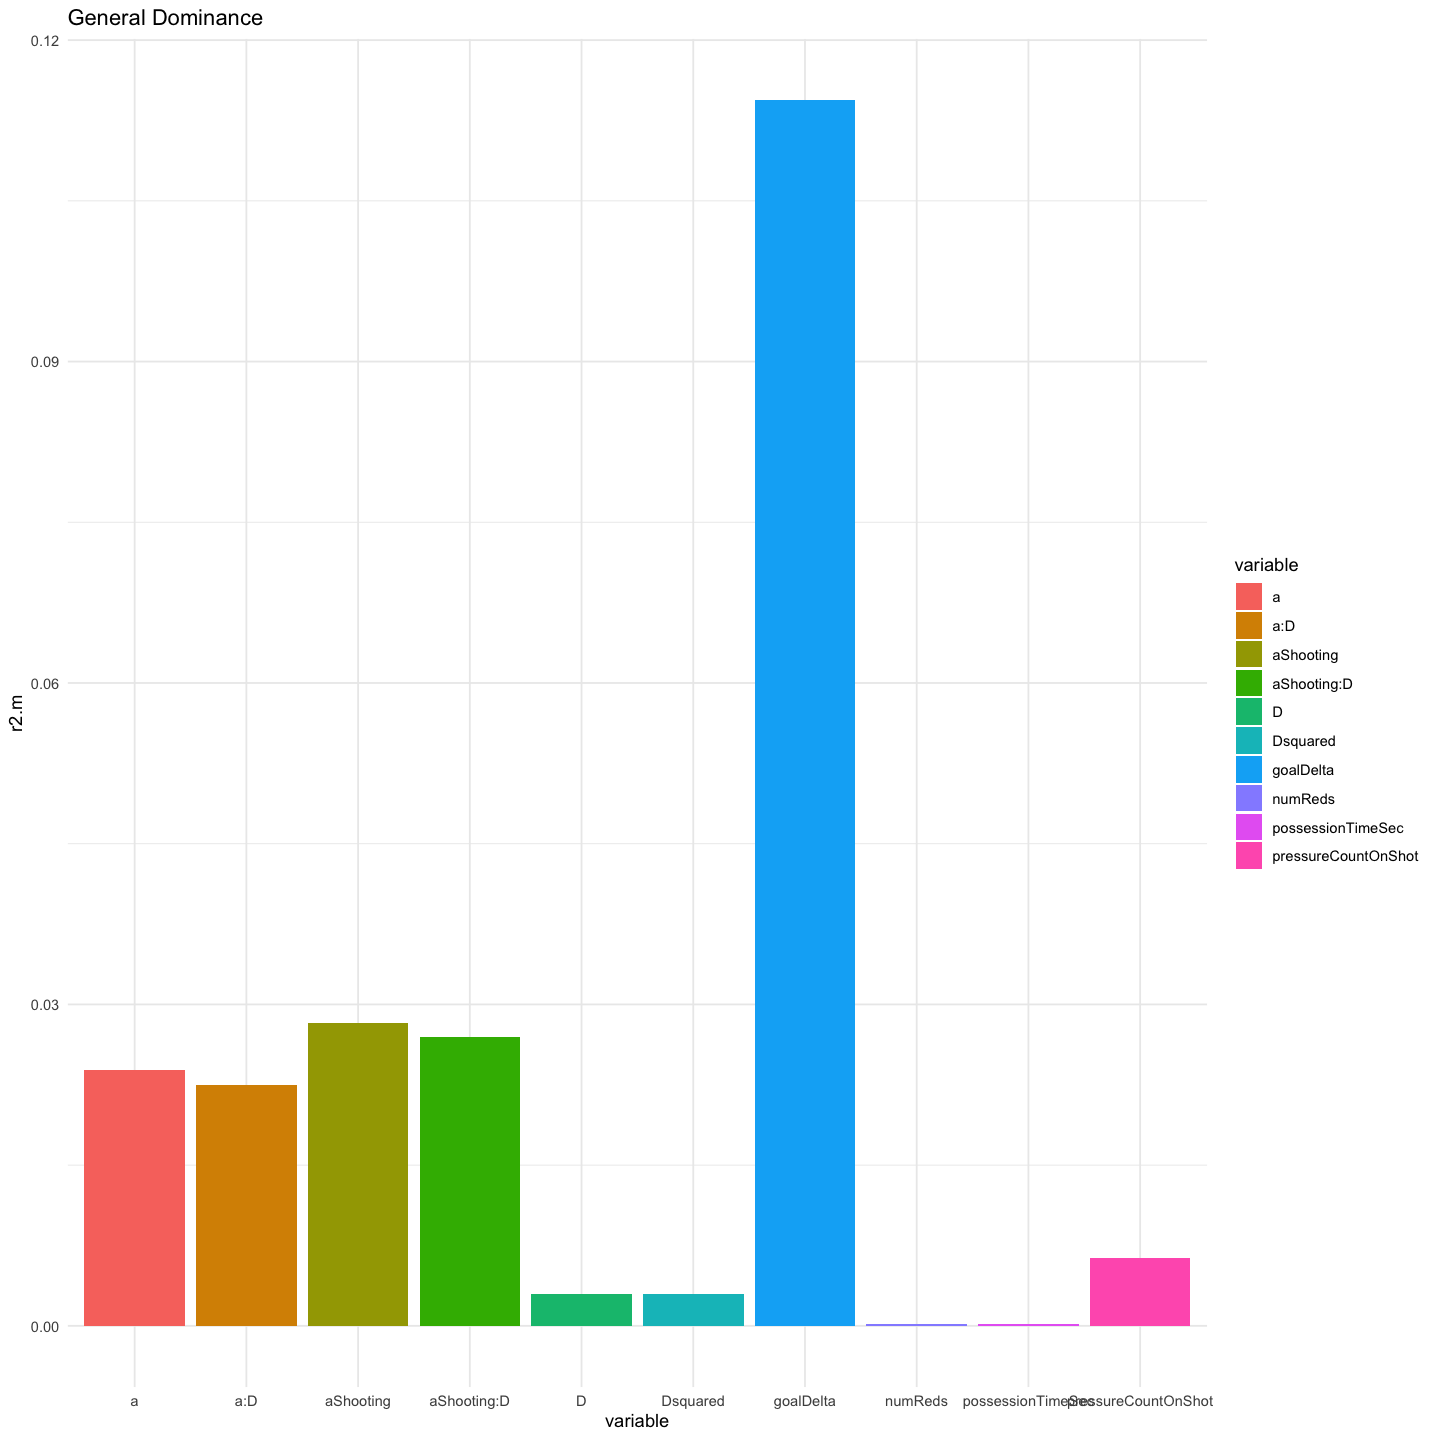

In [305]:
plot(da.adv, which.graph ="general", fit.function = "r2.m", xlab = '')

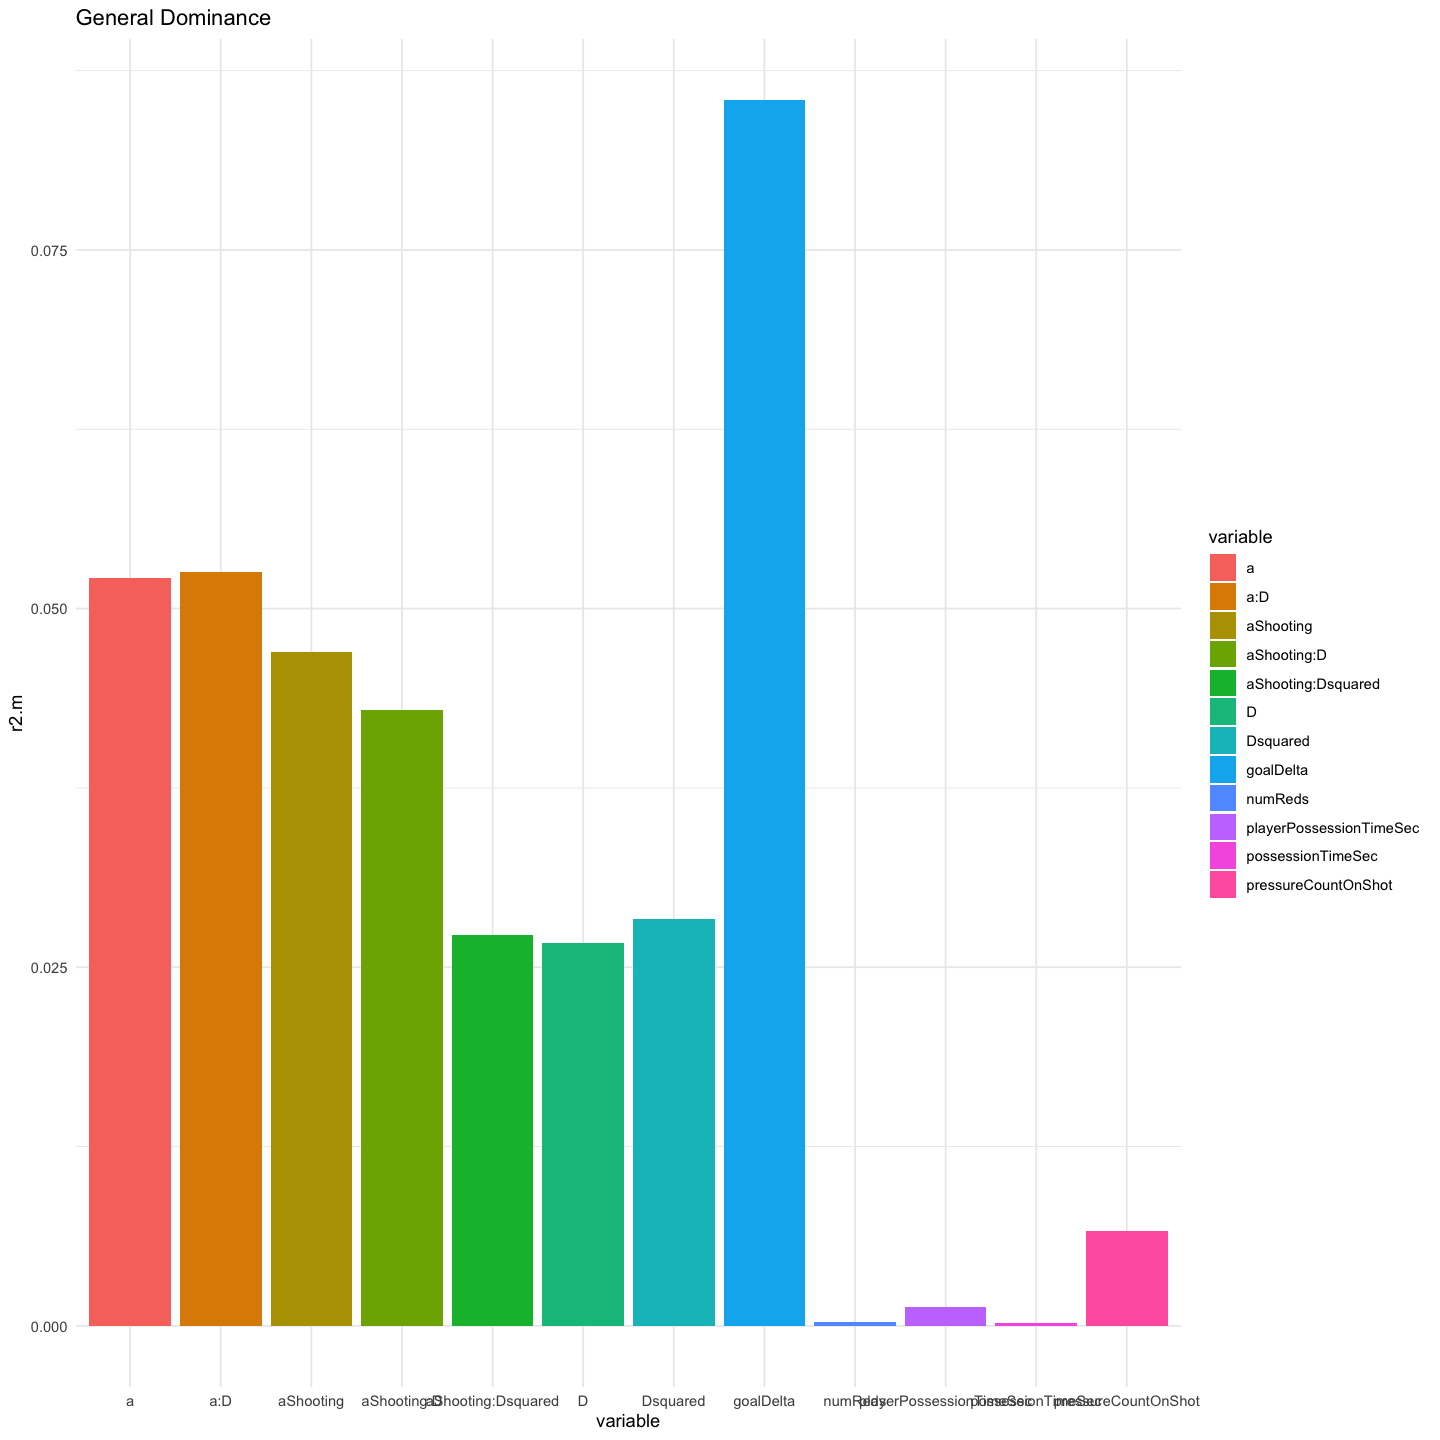

In [306]:
plot(da.syn, which.graph ="general", fit.function = "r2.m", xlab = '')

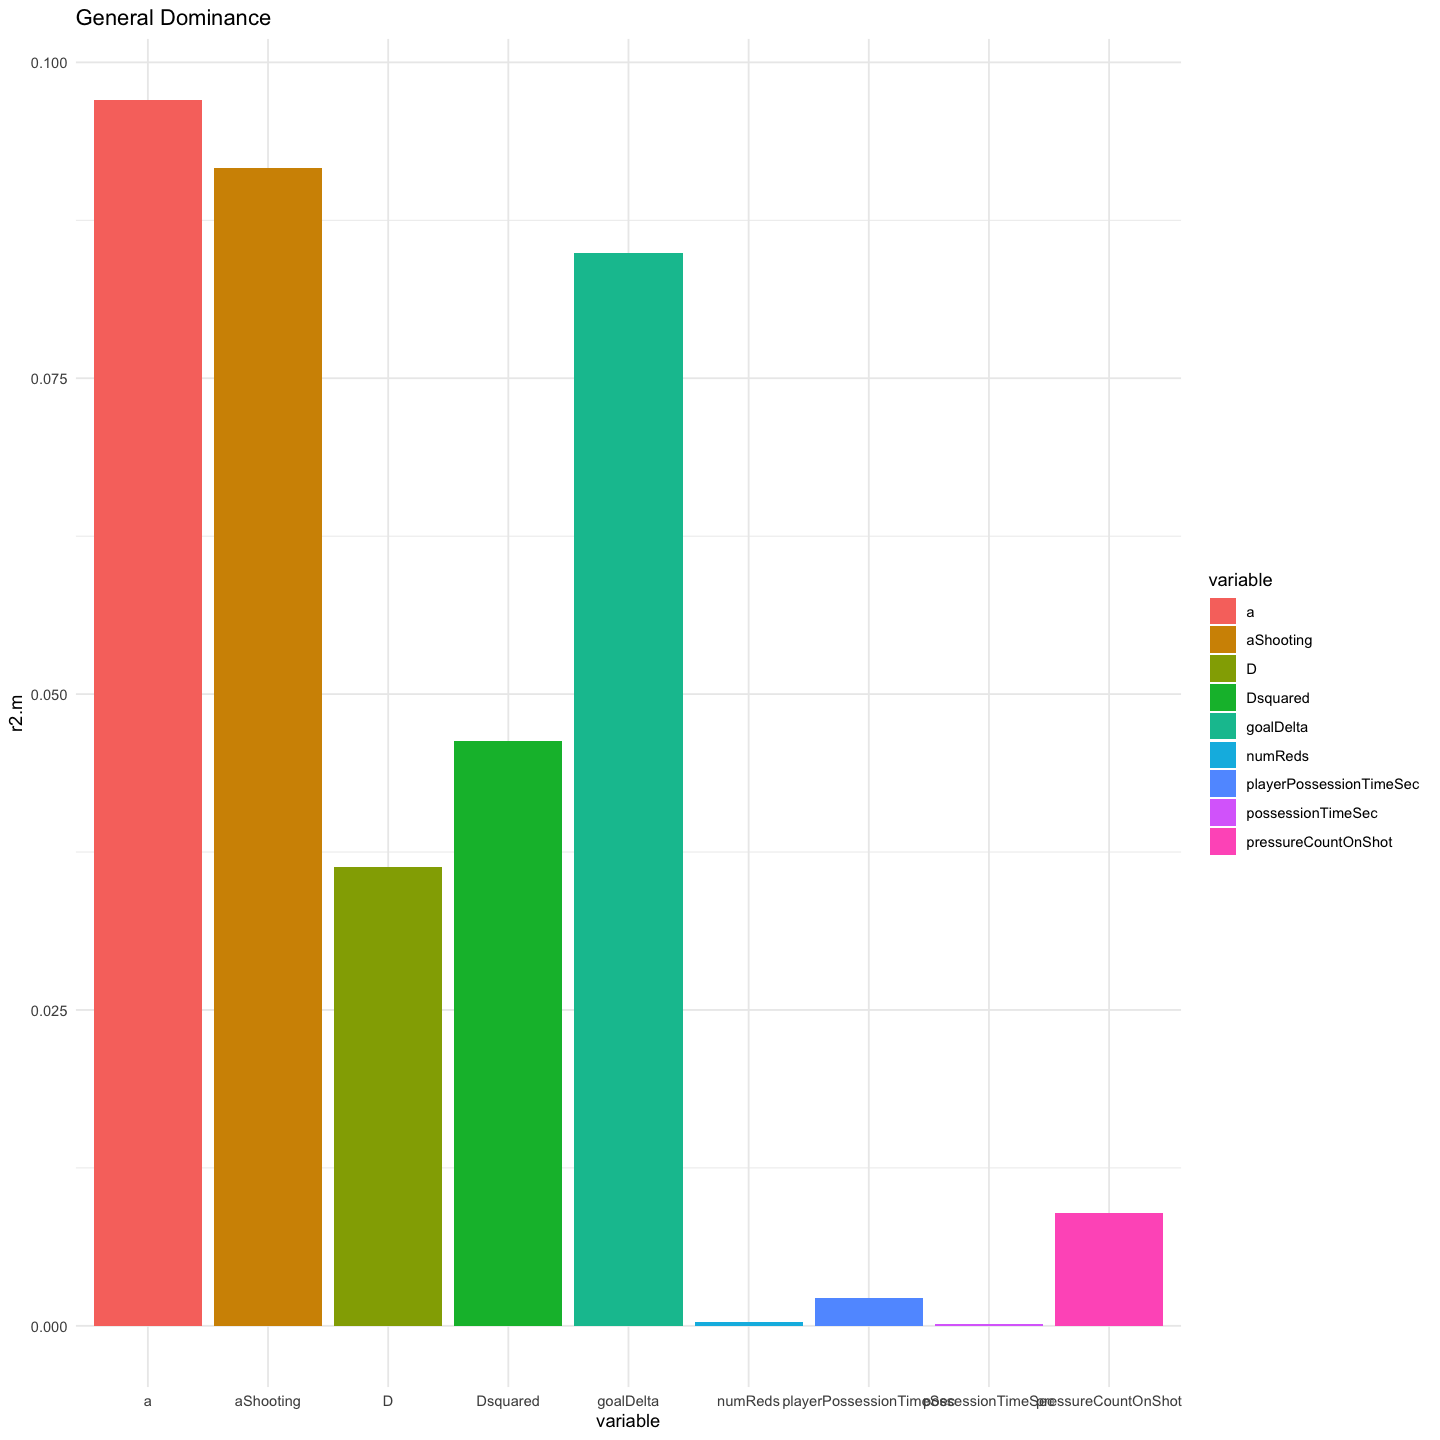

In [307]:
plot(da.adv.no.int, which.graph ="general", fit.function = "r2.m", xlab = '')

In [311]:
cor(df.shots.train[,basic.features])

,c1_m,x_dist_goal
c1_m,1.0000000,0.1174552
x_dist_goal,0.1174552,1.0000000


In [312]:
cor(df.shots.train[,added.features])

,c1_m,D,a,aShooting
c1_m,1.0000000,-0.65228263,0.4545190,-0.55278972
D,-0.6522826,1.00000000,0.3378520,0.01279148
a,0.4545190,0.33785198,1.0000000,-0.73091283
aShooting,-0.5527897,0.01279148,-0.7309128,1.00000000


In [456]:
adv.cor <- cor(df.shots.train[,adv.features])
adv.cor

,a,D,aShooting,Dsquared,goalDelta,numReds,possessionTimeSec,pressureCountOnShot,playerPossessionTimeSec
a,1.000000000,0.337851978,-0.73091283,0.362836578,-0.07651319,-0.003856741,-0.002814414,0.307725734,0.218169989
D,0.337851978,1.000000000,0.01279148,0.989337855,-0.04023923,0.006630424,0.030717249,0.338416260,0.085508540
aShooting,-0.730912829,0.012791478,1.00000000,-0.039132436,0.05937387,0.011027048,0.036945956,-0.174371484,-0.148006547
Dsquared,0.362836578,0.989337855,-0.03913244,1.000000000,-0.04131141,0.004464332,0.028908433,0.368009616,0.093913187
goalDelta,-0.076513185,-0.040239231,0.05937387,-0.041311406,1.00000000,0.071396138,0.036407880,-0.036565441,-0.013376230
numReds,-0.003856741,0.006630424,0.01102705,0.004464332,0.07139614,1.000000000,0.028770122,-0.003586982,0.012055440
possessionTimeSec,-0.002814414,0.030717249,0.03694596,0.028908433,0.03640788,0.028770122,1.000000000,-0.012465746,0.483297179
pressureCountOnShot,0.307725734,0.338416260,-0.17437148,0.368009616,-0.03656544,-0.003586982,-0.012465746,1.000000000,-0.009064718
playerPossessionTimeSec,0.218169989,0.085508540,-0.14800655,0.093913187,-0.01337623,0.012055440,0.483297179,-0.009064718,1.000000000


In [459]:
adv.cor[adv.cor < -0.5]

[1] -0.7309128 -0.7309128

In [470]:
df.r2 <- data.frame(da.syn$contribution.average$r2.m)
df.r2$Feature <- rownames(df.r2)
colnames(df.r2) <- c('r2.m','Feature')

df.r2 <- df.r2[order(-df.r2$r2.m),]

df.r2$r2.m <- df.r2$r2.m / sum(df.r2$r2.m)

white.names <- c("Game State", "Shooting Angle $\\times$ D", "Shooting Angle", "Visible Angle","Visible Angle $\\times$ D","$D^2$"
                ,"Visible Angle $\\times$ $D^2$","D","","","","")

black.names <- c("","","","","","","",""
                 ,"Shot Pressure Count","Player Possession Time","  Red Card Count","Team Possession Time")

df.r2$Feature <- factor(df.r2$Feature, levels = c("goalDelta", "a:D", "a", "aShooting","aShooting:D","Dsquared"
                                            ,"aShooting:Dsquared","D","pressureCountOnShot"
                                            ,"playerPossessionTimeSec","numReds","possessionTimeSec"))

df.r2$white.names <- white.names
df.r2$black.names <- black.names

df.r2

,r2.m,Feature,white.names,black.names
,<dbl>,<fct>,<chr>,<chr>
goalDelta,0.2304674761,goalDelta,Game State,
a:D,0.1417405782,a:D,Shooting Angle $\times$ D,
a,0.1405615344,a,Shooting Angle,
aShooting,0.1267316285,aShooting,Visible Angle,
aShooting:D,0.1158604868,aShooting:D,Visible Angle $\times$ D,
Dsquared,0.0765318512,Dsquared,$D^2$,
aShooting:Dsquared,0.0734099638,aShooting:Dsquared,Visible Angle $\times$ $D^2$,
D,0.0720122046,D,D,
pressureCountOnShot,0.0178395984,pressureCountOnShot,,Shot Pressure Count


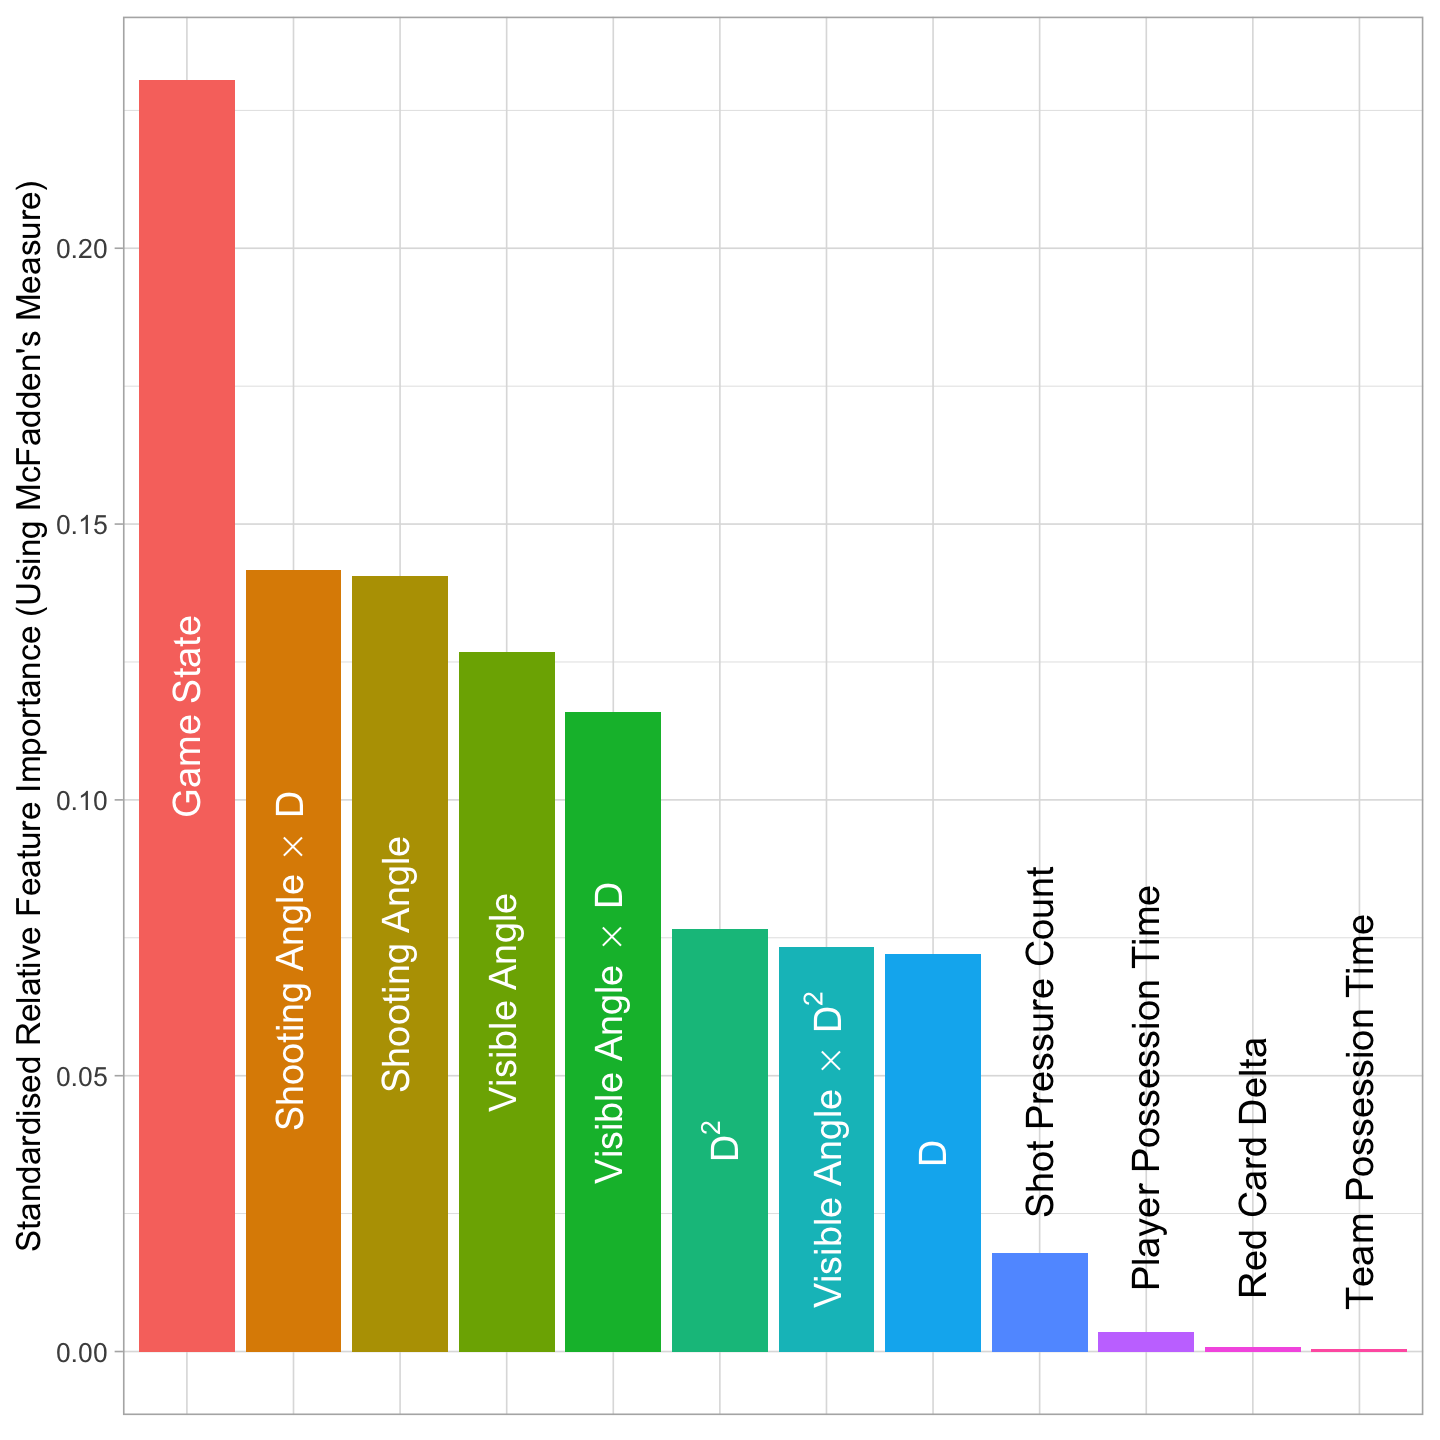

In [445]:
ggplot(df.r2, aes(y=r2.m, x=Feature)) + 
    geom_bar(aes(fill=Feature), position="dodge2", stat="identity") +
    geom_text(aes(y=r2.m/2, label=TeX(white.names, output='character')), angle=90, color='white', position = position_dodge(width = 0.9), size=8, parse=TRUE) +
    geom_text(aes(label=black.names), angle=90, color='black', position = position_dodge(width = 0.9), hjust=-0.1, size=8) +
    labs(y = 'Standardised Relative Feature Importance (Using McFadden\'s Measure)') +
    theme_light(base_size = 20) +
    #guides(fill=guide_legend(title="Kane Concentration Rank")) +
    theme(legend.position = "none", axis.title.x = element_blank(), axis.ticks.x = element_blank(), axis.text.x = element_blank()) +
    #coord_flip()

ggsave('/Users/christian/Desktop/University/Birkbeck MSc Applied Statistics/Project/Plots/xG Calibration/DominanceAnalysis.png', dpi=300, width = 10, height=10, units='in')

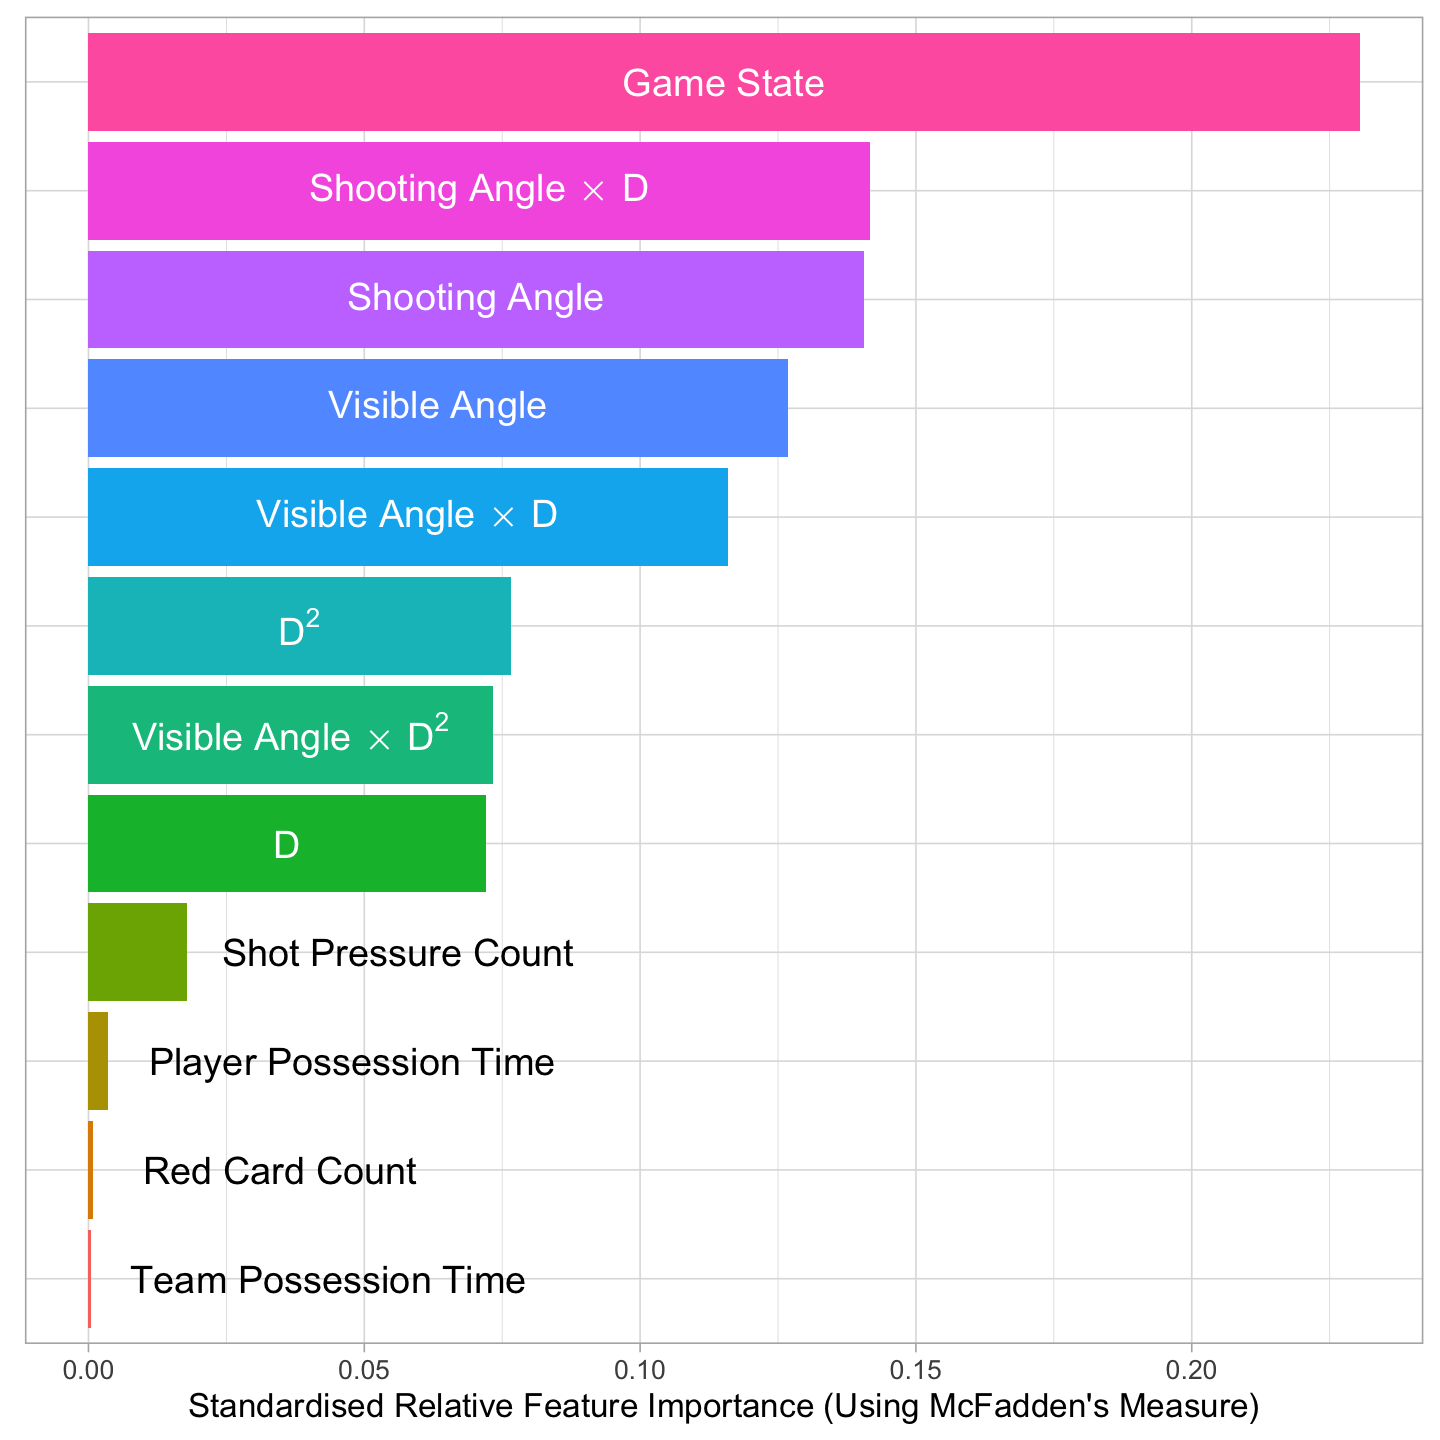

In [471]:

df.r2$Feature <- factor(df.r2$Feature, levels = c("possessionTimeSec","numReds","playerPossessionTimeSec","pressureCountOnShot"
                                                  ,"D","aShooting:Dsquared","Dsquared","aShooting:D", "aShooting", "a", "a:D","goalDelta"))

ggplot(df.r2, aes(y=r2.m, x=Feature)) + 
    geom_bar(aes(fill=Feature), position="dodge2", stat="identity") +
    geom_text(aes(y=r2.m/2, label=TeX(white.names, output='character')), color='white', position = position_dodge(width = 0.9), size=8, parse=TRUE) +
    geom_text(aes(label=black.names), color='black', position = position_dodge(width = 0.9), hjust=-0.1, size=8) +
    labs(y = 'Standardised Relative Feature Importance (Using McFadden\'s Measure)') +
    theme_light(base_size = 20) +
    #guides(fill=guide_legend(title="Kane Concentration Rank")) +
    theme(legend.position = "none", axis.title.y = element_blank(), axis.ticks.y = element_blank(), axis.text.y = element_blank()) +
    coord_flip()

ggsave('/Users/christian/Desktop/University/Birkbeck MSc Applied Statistics/Project/Plots/xG Calibration/DominanceAnalysis.png', dpi=300, width = 10, height=10, units='in')